# AustinTrafficPy

Eric Staveley  MWSa

## Analysis

* xxx

* yyy

* zzz

In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
#import gmaps

# Import API (api_key) key from api_keys.py
#from api_keys import api_key
#from api_keys import gkey

# Incorporated citipy to determine city based on latitude and longitude
#from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/aus_traffic.csv"

# Range of latitudes and longitudes
#lat_range = (-90, 90)
#lng_range = (-180, 180)

#get current time
now = datetime.datetime.now()


In [2]:
#we r using the csv though for now...

#real deal for looping here:
# Build partial query URL..city to be added later
#query_url = f"{url}appid={api_key}&units={units}&q="

query_url = "https://data.austintexas.gov/resource/r3af-2r8x.json"
print(query_url)

https://data.austintexas.gov/resource/r3af-2r8x.json


In [3]:
response = requests.get(query_url).json()
#print(response)

In [4]:
#print a pretty better json structure display:
print(json.dumps(response, indent=4, sort_keys=True))


[
    {
        "address": "11900 ANDERSON MILL RD",
        "issue_reported": "Traffic Hazard",
        "latitude": "30.455532",
        "location": "(30.455532,-97.825996)",
        "longitude": "-97.825996",
        "published_date": "2018-07-24T08:26:07.000",
        "traffic_report_id": "0419AA9EEA9D9BE6D70580D8F6C852622FCC00E5_1532438767",
        "traffic_report_status": "ARCHIVED",
        "traffic_report_status_date_time": "2018-07-24T09:10:02.000"
    },
    {
        "address": "12113 Metric Blvd",
        "issue_reported": "Crash Urgent",
        "latitude": "30.404051",
        "location": "(30.404051,-97.698788)",
        "longitude": "-97.698788",
        "published_date": "2019-02-12T00:05:06.000",
        "traffic_report_id": "8815061C1A6C63398B9A2DFB1F44AAE89DD59BFD_1549951506",
        "traffic_report_status": "ARCHIVED",
        "traffic_report_status_date_time": "2019-02-12T00:25:04.000"
    },
    {
        "address": "8100 Dee Gabriel Collins Rd",
        "issue_

In [5]:
len(response)    # i could only find a way to get 1000...so using .csv method

1000

In [6]:
df = pd.DataFrame(response)
df.head()

,address,issue_reported,latitude,location,longitude,published_date,traffic_report_id,traffic_report_status,traffic_report_status_date_time
0,11900 ANDERSON MILL RD,Traffic Hazard,30.455532,"(30.455532,-97.825996)",-97.825996,2018-07-24T08:26:07.000,0419AA9EEA9D9BE6D70580D8F6C852622FCC00E5_15324...,ARCHIVED,2018-07-24T09:10:02.000
1,12113 Metric Blvd,Crash Urgent,30.404051,"(30.404051,-97.698788)",-97.698788,2019-02-12T00:05:06.000,8815061C1A6C63398B9A2DFB1F44AAE89DD59BFD_15499...,ARCHIVED,2019-02-12T00:25:04.000
2,8100 Dee Gabriel Collins Rd,COLLISION,30.170621,"(30.170621,-97.699983)",-97.699983,2019-02-12T00:44:01.000,DEC1A498150A3E32C6D3C392C23801FC301DB7C9_15499...,ARCHIVED,2019-02-12T01:00:06.000
3,9308-9424 WESTMINSTER GLEN AVE,TRFC HAZD/ DEBRIS,30.364876,"(30.364876,-97.839997)",-97.839997,2018-09-13T13:32:07.000,4AB46ED419587791DCEF1A1E2391AD6C371A26B9_15368...,ARCHIVED,2018-09-13T13:40:03.000
4,5180 E Sh 71 Eb,COLLISION,30.186774,"(30.186774,-97.557167)",-97.557167,2018-11-11T21:52:31.000,A2DAE302A48D5CBE257B8DB4C150CF14C602A71B_15419...,ARCHIVED,2018-11-11T22:15:04.000


In [7]:
##Austin:  30.2672° N, 97.7431° W    per wiki...center
type(df["published_date"])

pandas.core.series.Series

In [8]:
print(df.iloc[0,5])
type(df.iloc[0,5])

2018-07-24T08:26:07.000


str

In [9]:
dateconv_df = pd.to_datetime(df['published_date'])

In [10]:
dateconv_df.head()

0   2018-07-24 08:26:07
1   2019-02-12 00:05:06
2   2019-02-12 00:44:01
3   2018-09-13 13:32:07
4   2018-11-11 21:52:31
Name: published_date, dtype: datetime64[ns]

In [11]:
df['published_date'] =  pd.to_datetime(df['published_date'])
df.head()
df['traffic_report_status_date_time'] =  pd.to_datetime(df['traffic_report_status_date_time'])
df.head()
#len(df)

,address,issue_reported,latitude,location,longitude,published_date,traffic_report_id,traffic_report_status,traffic_report_status_date_time
0,11900 ANDERSON MILL RD,Traffic Hazard,30.455532,"(30.455532,-97.825996)",-97.825996,2018-07-24 08:26:07,0419AA9EEA9D9BE6D70580D8F6C852622FCC00E5_15324...,ARCHIVED,2018-07-24 09:10:02
1,12113 Metric Blvd,Crash Urgent,30.404051,"(30.404051,-97.698788)",-97.698788,2019-02-12 00:05:06,8815061C1A6C63398B9A2DFB1F44AAE89DD59BFD_15499...,ARCHIVED,2019-02-12 00:25:04
2,8100 Dee Gabriel Collins Rd,COLLISION,30.170621,"(30.170621,-97.699983)",-97.699983,2019-02-12 00:44:01,DEC1A498150A3E32C6D3C392C23801FC301DB7C9_15499...,ARCHIVED,2019-02-12 01:00:06
3,9308-9424 WESTMINSTER GLEN AVE,TRFC HAZD/ DEBRIS,30.364876,"(30.364876,-97.839997)",-97.839997,2018-09-13 13:32:07,4AB46ED419587791DCEF1A1E2391AD6C371A26B9_15368...,ARCHIVED,2018-09-13 13:40:03
4,5180 E Sh 71 Eb,COLLISION,30.186774,"(30.186774,-97.557167)",-97.557167,2018-11-11 21:52:31,A2DAE302A48D5CBE257B8DB4C150CF14C602A71B_15419...,ARCHIVED,2018-11-11 22:15:04


# OUR ACTUAL DATA GATHER STARTS HERE

In [12]:
#csv method...since we could get a larger dataset
data_file = "Resources/Real-Time_Traffic_Incident_Reports.csv"
df_from_csv = pd.read_csv(data_file)
df_from_csv.head(20)

print(f"Raw data record count: {len(df_from_csv)}")


Raw data record count: 98324


In [13]:
#clean up the data

#get rid of the NaNs found in Location
#19	9BD7909EA32C89F68E82ED0CBE1F30A2E1D72B1C_15323...	07/23/2018 09:39:17 PM +0000	zSTALLED VEHICLE	NaN	0.000000	0.000000	3339 W BRAKER LN	ARCHIVED	07/23/2018 10:15:02 PM +0000

print(f"Non-NA values per column:\n{df_from_csv.count()}")   #show the non-NA cells for each field

#remove the rows with any empty cells
df_from_csv_clean = df_from_csv.dropna(how='any')

print(f"Total of rows with complete data now: {len(df_from_csv_clean)}")

print("Removing invalid longitude and latitude...")
#ensure lat and long are valid.  -90<=lat<=90     -180<=lon<=180
#lat
row_condition = df_from_csv_clean["Latitude"] <= 90
filtered_df = df_from_csv_clean.loc[row_condition]
row_condition = filtered_df["Latitude"] >= -90
filtered_df = filtered_df.loc[row_condition]

#long
row_condition = filtered_df["Longitude"] <= 180
filtered_df = filtered_df.loc[row_condition]
row_condition = filtered_df["Longitude"] >= -180
filtered_df = filtered_df.loc[row_condition]

print(f"Total number of rows with valid lat/long data: {len(filtered_df)}")
df_from_csv_clean = filtered_df   #re-assign filtered df back to our orig name


Non-NA values per column:
Traffic Report ID    98324
Published Date       98324
Issue Reported       98324
Location             98045
Latitude             98245
Longitude            98245
Address              98324
Status               96631
Status Date          98324
dtype: int64
Total of rows with complete data now: 96358
Removing invalid longitude and latitude...
Total number of rows with valid lat/long data: 96352


In [14]:
#df_from_csv_clean.count() 

In [15]:
#convert the date strings in the DF to valid datetime types
df_from_csv_clean['Published Date'] =  pd.to_datetime(df_from_csv_clean['Published Date'])
#df_from_csv_clean.head()
df_from_csv_clean['Status Date'] =  pd.to_datetime(df_from_csv_clean['Status Date'])
df_from_csv_clean.head()

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date
0,C163BCD1CF90C984E9EDA4DBA311BCA369A7D1A1_15288...,2018-06-13 06:35:59,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,ARCHIVED,2018-06-13 09:00:03
1,2664C206999E7419517EE39E177797576A52201B_15381...,2018-09-29 00:52:58,Traffic Hazard,"(30.380525,-97.737873)",30.380525,-97.737873,0 Mopac Sb To Research Sb Ramp,ARCHIVED,2018-09-29 01:35:03
2,5BB246A3223A89C7FB9B2EED9A2EBDA82141406D_15438...,2018-12-03 17:49:02,Crash Service,"(30.278372,-97.671971)",30.278372,-97.671971,5800 Techni Center Dr,ARCHIVED,2018-12-03 18:30:03
3,6B20382196FB454E9FD06A33E60142902A2F0706_15288...,2018-06-13 10:15:36,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,ARCHIVED,2018-06-13 11:20:03
4,7FD2528A7609AAECB6AF825AC275F98CFDFFF8AD_15382...,2018-09-29 12:47:30,Traffic Hazard,"(30.281659,-97.728551)",30.281659,-97.728551,0 N Ih 35 Ud Sb To Mlk Ramp,ARCHIVED,2018-09-29 13:00:03


In [16]:
#peek at the earlies and latest date in our DF
earliest_date = min(df_from_csv_clean["Published Date"])
print(f"Earliest date: {earliest_date}")
latest_date = max(df_from_csv_clean["Published Date"])
print(f"Latest date: {latest_date}")
type(latest_date)     #confirm the type

Earliest date: 2017-09-26 16:11:00
Latest date: 2019-03-06 02:37:18


pandas._libs.tslibs.timestamps.Timestamp

In [17]:
# Google developer API key
# from api_keys import gkey

# Access maps with unique API key
# gmaps.configure(api_key=gkey)


In [18]:
# code to take the lat and long and make a list for gmap

aus_lat = df_from_csv_clean["Latitude"]    #series
aus_long = df_from_csv_clean["Longitude"]    #series

aus_lat_subset = aus_lat.head(1000)   #make a subset to test
aus_long_subset = aus_long.head(1000)  # make a subset to test

#print(type(aus_lat_subset))     #its a series
#print(aus_lat_subset[0])        #whats the value?
#print(type(aus_lat_subset[0]))    #its a string

#print(aus_lat_subset)   #show the whole lat subset

#using zip function to zip the lat and long together to a list with each element being a tuple
aus_lat_long_list_subset = list(zip(aus_lat_subset, aus_long_subset))
aus_lat_long_list = list(zip(aus_lat, aus_long))

#print(aus_lat_long_list_subset)
#type(aus_lat_long_list_subset[0])    #each element is a tuple...yay!

In [19]:
# Customize the size of the figure      was   400 x 300
# figure_layout = {
#     'width': '800px',
#     'height': '600px',
#     'border': '1px solid black',
#     'padding': '1px',
#     'margin': '0 auto 0 auto'
# }
# fig = gmaps.figure(layout=figure_layout)

In [20]:
# Assign the marker layer to a variable  ..      DOING THE SUBSET HERE... TAKES ABOUT 10sec  

#help(gmaps.marker_layer)

# markers = gmaps.marker_layer(aus_lat_long_list_subset)
# # Add the layer to the map
# fig.add_layer(markers)
# fig

In [21]:
#extracting the marker image is a bit different than plt.savefig....basically
#gmaps only lets you save the .html  OR  you can manually dload the fig 
#within the display frame
#per https://jupyter-gmaps.readthedocs.io/en/latest/export.html
#
#to export:
#from ipywidgets.embed import embed_minimal_html
#embed_minimal_html('exported_filename_here.html', views=[fig])
#
#to open the file:
#python -m http.server 8080
#Navigate to http://0.0.0.0:8080/exported_filename.html and you should see the export!


In [22]:
#help(gmaps.marker_layer)

# Filter Data for Plotting

In [23]:
# df_from_csv_clean.head()

In [24]:
print(len(df_from_csv_clean))

96352


In [25]:
# df_from_csv_clean.dtypes

In [26]:
#use only 2018 data now
#keep only 2018 data
row_condition = df_from_csv_clean["Published Date"] <= "2018-12-31 23:59:59"
filtered_df = filtered_df.loc[row_condition]
row_condition = filtered_df["Published Date"] >= "2018-01-01 00:00:01"
filtered_df = filtered_df.loc[row_condition]

print(f"Total number of rows with 2018 data  {len(filtered_df)}")
df_from_csv_clean = filtered_df   #re-assign filtered df back to our orig name

Total number of rows with 2018 data  68244


In [27]:
# filtered_df['Issue Reported'].value_counts().index.tolist()

In [28]:
analysis_issues = ('Crash Urgent', 'Crash Service', 'COLLISION', 'COLLISION WITH INJURY', 'COLLISN/ LVNG SCN', 'COLLISION/Private Property', 'TRAFFIC FATALITY')
analysis_df = filtered_df[filtered_df['Issue Reported'].isin(analysis_issues)]
# analysis_df.tail()

In [29]:
# analysis_df.count()

In [30]:
# # splitting datetime to be able to filter by date or by time of day later
# nfp = pd.read_csv("Resources/Real-Time_Traffic_Incident_Reports.csv", parse_dates=[1], infer_datetime_format=True)
# temp = pd.DatetimeIndex(nfp['Published Date'])
# nfp['Date'] = temp.date
# nfp['Time'] = temp.time
# filtering_df = pd.DataFrame(nfp)
# filtering_df.head()

In [31]:
# filtering_df.dtypes

In [32]:
# bring in 2018 fatality data
# df_fatality_2018 = pd.read_csv("2018_APD_Traffic_Fatality_Data_021219.csv")
# df_fatality_2018.tail()

In [33]:
# df_fatality_2018["Day"].value_counts()

In [34]:
# df_fatality_2018.columns

In [35]:
# filtering_df.head()

In [36]:
am_time_mask = (analysis_df['Published Date'].dt.hour >= 0) & \
           (analysis_df['Published Date'].dt.hour <= 5)
am_report_df = analysis_df[am_time_mask]
# am_report_df.head()

In [37]:
mid_time_mask = (analysis_df['Published Date'].dt.hour >= 9) & \
           (analysis_df['Published Date'].dt.hour <= 15)
mid_report_df = analysis_df[mid_time_mask]
# mid_report_df.head()

In [38]:
pm_time_mask = (analysis_df['Published Date'].dt.hour >= 19) & \
           (analysis_df['Published Date'].dt.hour <= 24)
pm_report_df = analysis_df[pm_time_mask]
# pm_report_df.head()

In [39]:
non_rush_1_df = am_report_df.append(mid_report_df, ignore_index=True)
# non_rush_1_df.head()

In [40]:
non_rush_df = non_rush_1_df.append(pm_report_df, ignore_index=True)
non_rush_df.head()

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date
0,69E356FC5B897FF52301D1A4D870E2862A05C244_15324...,2018-07-24 05:40:48,COLLISION,"(30.094498,-97.761155)",30.094498,-97.761155,6700-7940 S SH 45 E WB,ARCHIVED,2018-07-24 06:45:02
1,B039469E10CC32B9EB6AAEE8AABB64A15836746F_15381...,2018-09-29 00:58:05,Crash Service,"(30.287391,-97.741586)",30.287391,-97.741586,2340 Guadalupe St,ARCHIVED,2018-09-29 01:40:03
2,A0A82EBDD4A855C999B56CE855A244A672DCAFFF_15381...,2018-09-29 00:54:38,Crash Service,"(30.225971,-97.804548)",30.225971,-97.804548,Jones Rd & West Wind Trl,ARCHIVED,2018-09-29 02:10:03
3,08D67B9F9F6E2794FD86FD4B7E70E8360CCDBEAD_15381...,2018-09-29 02:37:20,Crash Service,"(30.311435,-97.709675)",30.311435,-97.709675,5200-5226 N Ih 35 Svrd Sb,ARCHIVED,2018-09-29 03:10:02
4,1D533EC2E7D744E1AC9A2E874A5F269093234DF3_15382...,2018-09-30 05:04:56,Crash Urgent,"(30.411702,-97.722008)",30.411702,-97.722008,Amherst Dr & Duval Rd,ARCHIVED,2018-09-30 06:05:02


In [41]:
non_rush_df.count()

Traffic Report ID    24666
Published Date       24666
Issue Reported       24666
Location             24666
Latitude             24666
Longitude            24666
Address              24666
Status               24666
Status Date          24666
dtype: int64

In [78]:
# Filter analysis df by month for plotting
# Generate January report
jan_mask = (analysis_df['Published Date'].dt.month == 1)
jan_report_df = analysis_df[jan_mask]
jan_count = jan_report_df['Published Date'].count()

In [79]:
# Generate February report
feb_mask = (analysis_df['Published Date'].dt.month == 2)
feb_report_df = analysis_df[feb_mask]
feb_count = feb_report_df['Published Date'].count()

In [80]:
# Generate March report
mar_mask = (analysis_df['Published Date'].dt.month == 3)
mar_report_df = analysis_df[mar_mask]
mar_count = mar_report_df['Published Date'].count()

In [81]:
# Generate April report
apr_mask = (analysis_df['Published Date'].dt.month == 4)
apr_report_df = analysis_df[apr_mask]
apr_count = apr_report_df['Published Date'].count()

In [82]:
# Generate May report
may_mask = (analysis_df['Published Date'].dt.month == 5)
may_report_df = analysis_df[may_mask]
may_count = may_report_df['Published Date'].count()

In [83]:
# Generate June report
jun_mask = (analysis_df['Published Date'].dt.month == 6)
jun_report_df = analysis_df[jun_mask]
jun_count = jun_report_df['Published Date'].count()

In [84]:
# Generate July report
jul_mask = (analysis_df['Published Date'].dt.month == 7)
jul_report_df = analysis_df[jul_mask]
jul_count = jul_report_df['Published Date'].count()

In [85]:
# Generate August report
aug_mask = (analysis_df['Published Date'].dt.month == 8)
aug_report_df = analysis_df[aug_mask]
aug_count = aug_report_df['Published Date'].count()

In [86]:
# Generate September report
sep_mask = (analysis_df['Published Date'].dt.month == 9)
sep_report_df = analysis_df[sep_mask]
sep_count = sep_report_df['Published Date'].count()

In [87]:
# Generate October report
oct_mask = (analysis_df['Published Date'].dt.month == 10)
oct_report_df = analysis_df[oct_mask]
oct_count = oct_report_df['Published Date'].count()

In [88]:
# Generate November report
nov_mask = (analysis_df['Published Date'].dt.month == 11)
nov_report_df = analysis_df[nov_mask]
nov_count = nov_report_df['Published Date'].count()

In [89]:
# Generate December report
dec_mask = (analysis_df['Published Date'].dt.month == 12)
dec_report_df = analysis_df[dec_mask]
dec_count = dec_report_df['Published Date'].count()
dec_count

3059

In [74]:
# # df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# monthly_df = analysis_df.loc[analysis_df.groupby([pd.Grouper(key='Published Date')]).count()]
# monthly_df

In [75]:
# # Create a group based on the values in the 'maker' column
# results_by_month = analysis_df.groupby['Published Date'].dt.month

# # Count how many times each maker appears in our group
# month_count = results_by_month['Published Date'].count()

# month_count

In [90]:
months = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
accidents = [
    jan_count, feb_count, mar_count, apr_count, may_count, jun_count,
    jul_count, aug_count, sep_count, oct_count, nov_count, dec_count
]

x_axis = np.arange(len(months))

<IPython.core.display.Javascript object>


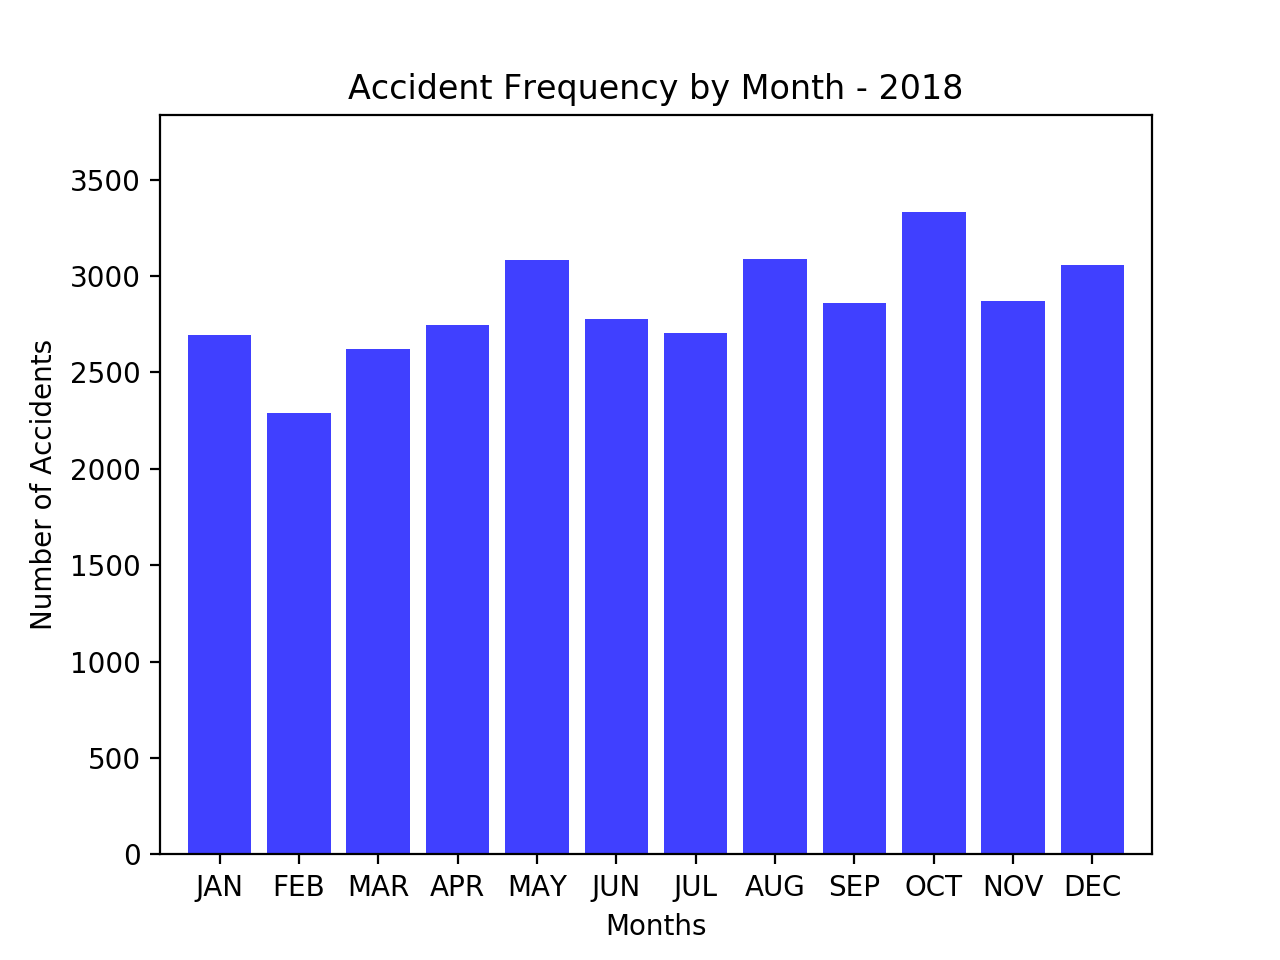

In [92]:
# Create a bar chart based upon the above data
plt.bar(x_axis, accidents, color="blue", alpha=0.75, align="center")
# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, (months))
# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)
# Set the limits of the y axis
plt.ylim(0, max(accidents)+500)
# Give the chart a title, x label, and y label
plt.title("Accident Frequency by Month - 2018")
plt.xlabel("Months")
plt.ylabel("Number of Accidents")
# Save an image of the chart and print it to the screen
plt.savefig("output_data/MonthComparison.png")


In [ ]:
# datetime.date(year, month, day)
# year == 2018
# 1 <= month <= 12
# 1 <= day <= number of days in the given month and year

In [ ]:
# # Create scatter plots for analysis
# # Scatter plot #1 = 
# plt.figure(1)
# lat = analysis_df['lat'].dropna()
# max_temp = analysis_df['max temp'].dropna()

# # The maximum x value for our chart will be 90
# x_limit = 90

# # The x limits of our scatter plot is -90 to 90
# plt.xlim(-90, x_limit)

# # List of values from 0 to 100 each value being 1 greater than the last
# x_axis = np.arange(-90, x_limit, 20)

# # The maximum y value for our chart will be 120
# y_limit = 120

# # The y limits of our scatter plot is 0 to 1
# plt.ylim(-60, y_limit)

# # Tells matplotlib that we want to make a scatter plot
# plt.scatter(lat, max_temp, marker="o", facecolors="blue", edgecolors="black",
#             s=15, alpha=0.5)
# plt.title("Max Temperature vs. City Latitude March 2019", fontsize=14)
# plt.xlabel("Latitude", fontsize=14)
# plt.ylabel("Max Temperature(F)", fontsize=14)
# plt.savefig("images/WxPy_Scatter(1).png")